In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/buyrentke.csv')
data=pd.read_csv('/content/drive/MyDrive/CSVFILES/buyrentke.csv')

In [4]:
!pip install ydata_profiling

In [5]:
from ydata_profiling import ProfileReport

In [6]:
# profile = ProfileReport(data, title="Nairobi House Rent Prices", explorative=True)

# profile.to_notebook_iframe()

In [7]:
data.head()

,Location,Bedrooms,Bathrooms,Amenities,Price
0,Kilimani,1.0,2.0,"['Backup Generator', 'Balcony', 'CCTV', 'En Su...","120,000\n / mont"
1,"Runda, Westlands",5.0,5.0,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...","460,000\n / mont"
2,Kilimani,4.0,4.0,"['Aircon', 'Backup Generator', 'En Suite', 'Fi...","260,000\n / mont"
3,"Westlands, 01, Westlands Area",NaN,NaN,"['Alarm', 'Backup Generator', 'Balcony', 'CCTV...",130\n / mont
4,"Westlands, 01, Westlands Area",NaN,NaN,"['Aircon', 'Alarm', 'Backup Generator', 'Balco...",130\n / mont


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6247 entries, 0 to 6246
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   6239 non-null   object 
 1   Bedrooms   5269 non-null   float64
 2   Bathrooms  4933 non-null   float64
 3   Amenities  6247 non-null   object 
 4   Price      6239 non-null   object 
dtypes: float64(2), object(3)
memory usage: 244.1+ KB


**Explanatory Data Analysis**

In [9]:
data.shape

(6247, 5)

**LOCATION**

In [10]:
#LOCATION
data['Location'] = data['Location'].str.strip(' ').str.capitalize().str.split(',')

print(data['Location'].head())

0                           [Kilimani]
1                  [Runda,  westlands]
2                           [Kilimani]
3    [Westlands,  01,  westlands area]
4    [Westlands,  01,  westlands area]
Name: Location, dtype: object


In [11]:
def extract_locations(data, column):
  unique_locations = set()
  new_locations = []
  for location in data[column]:
    try:
      if len(location) == 1 and location[0] not in unique_locations:
        unique_locations.add(location[0])
    except TypeError:
      pass

  for location in data[column]:
    if type(location) != list:
      new_locations.append(np.nan)
      continue

    is_checked = False
    if len(location) != 1:
      for loc in location:
        if loc in unique_locations:
          new_locations.append(loc)
          is_checked = True
          break
      if is_checked == False:
        new_locations.append(location[-1])
    else:
      new_locations.append(location[0])
  data.drop(column, axis=1, inplace=True)
  data['Location'] = new_locations
  return data

In [12]:
data_f = extract_locations(data, 'Location')

In [13]:
data = data_f

In [14]:
data['Location'] = data['Location'].str.strip().str.capitalize()

In [15]:
data['Location'].value_counts()

Location
Westlands                             3008
Lavington                              690
Kilimani                               586
Kileleshwa                             492
Karen                                  475
Kiambu road                            216
Muthaiga                               113
Mombasa road                           111
Upper hill                              66
Thika road                              64
Industrial area                         48
Westlands area                          36
Roysambu                                36
Ngong road                              32
Karen hardy                             28
Ruaraka                                 25
Riara road                              25
Nairobi cbd                             24
Valley arcade                           23
Ridgeways                               16
State house                             15
Hurlingham                              13
Ngara                                   12
Em

In [16]:
# Count occurrences of each location
location_counts = data['Location'].value_counts()

# Get locations where appearances are less than 2
locations_to_drop = location_counts[location_counts < 5].index.tolist()

# Drop rows with these locations
data = data[~data['Location'].isin(locations_to_drop)]

# Print the resulting DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6203 entries, 0 to 6246
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   5234 non-null   float64
 1   Bathrooms  4898 non-null   float64
 2   Amenities  6203 non-null   object 
 3   Price      6195 non-null   object 
 4   Location   6195 non-null   object 
dtypes: float64(2), object(3)
memory usage: 290.8+ KB


In [17]:
data['Location'].value_counts()

Location
Westlands          3008
Lavington           690
Kilimani            586
Kileleshwa          492
Karen               475
Kiambu road         216
Muthaiga            113
Mombasa road        111
Upper hill           66
Thika road           64
Industrial area      48
Roysambu             36
Westlands area       36
Ngong road           32
Karen hardy          28
Ruaraka              25
Riara road           25
Nairobi cbd          24
Valley arcade        23
Ridgeways            16
State house          15
Hurlingham           13
Ngara                12
Embakasi             11
Langata               9
Dennis pritt          9
Naivasha road         7
Buruburu              5
Name: count, dtype: int64

In [18]:
data['Location'].info()

<class 'pandas.core.series.Series'>
Index: 6203 entries, 0 to 6246
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
6195 non-null   object
dtypes: object(1)
memory usage: 96.9+ KB


**BEDROOMS**

In [19]:
data['Bedrooms'].fillna(data['Bedrooms'].median(), inplace=True)
print(data['Bedrooms'].info())

<class 'pandas.core.series.Series'>
Index: 6203 entries, 0 to 6246
Series name: Bedrooms
Non-Null Count  Dtype  
--------------  -----  
6203 non-null   float64
dtypes: float64(1)
memory usage: 96.9 KB
None


<ipython-input-19-c6ec6abcdcd2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bedrooms'].fillna(data['Bedrooms'].median(), inplace=True)
<ipython-input-19-c6ec6abcdcd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bedrooms'].fillna(data['Bedrooms'].median(), inplace=True)


**BATHROOMS**

In [20]:
data['Bathrooms'].fillna(data['Bathrooms'].median(), inplace=True)
print(data['Bathrooms'].info())

<class 'pandas.core.series.Series'>
Index: 6203 entries, 0 to 6246
Series name: Bathrooms
Non-Null Count  Dtype  
--------------  -----  
6203 non-null   float64
dtypes: float64(1)
memory usage: 96.9 KB
None


<ipython-input-20-e597dabc114c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bathrooms'].fillna(data['Bathrooms'].median(), inplace=True)
<ipython-input-20-e597dabc114c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bathrooms'].fillna(data['Bathrooms'].median(), inplace=True)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6203 entries, 0 to 6246
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   6203 non-null   float64
 1   Bathrooms  6203 non-null   float64
 2   Amenities  6203 non-null   object 
 3   Price      6195 non-null   object 
 4   Location   6195 non-null   object 
dtypes: float64(2), object(3)
memory usage: 290.8+ KB


**AMENITIES**

In [22]:
data['Amenities'] = data['Amenities'].str.replace("[\[\]']", '').str.split(', ')
print(data['Amenities'].head())

0    [['Backup Generator', 'Balcony', 'CCTV', 'En S...
1    [['Alarm', 'BBQ', 'Backup Generator', 'Balcony...
2    [['Aircon', 'Backup Generator', 'En Suite', 'F...
3    [['Alarm', 'Backup Generator', 'Balcony', 'CCT...
4    [['Aircon', 'Alarm', 'Backup Generator', 'Balc...
Name: Amenities, dtype: object


<ipython-input-22-4d84e1389058>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amenities'] = data['Amenities'].str.replace("[\[\]']", '').str.split(', ')


In [23]:
def clean_amenities(amenities_list):
    return [amenity.strip("['']") for amenity in amenities_list]

# Apply the function to the 'amenities' column
data['Amenities'] = data['Amenities'].apply(clean_amenities)

<ipython-input-23-09ce05da65fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amenities'] = data['Amenities'].apply(clean_amenities)


In [24]:
# split the amenities
for amenity in data['Amenities'].explode().unique():
    data[amenity] = data['Amenities'].apply(lambda x: 1 if amenity in x else 0)

# Drop the original Amenities column
data.drop(columns=['Amenities'], inplace=True)
data.head()

<ipython-input-24-26a52d12cb81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[amenity] = data['Amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-24-26a52d12cb81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[amenity] = data['Amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-24-26a52d12cb81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,Bedrooms,Bathrooms,Price,Location,Backup Generator,Balcony,CCTV,En Suite,Furnished,Gym,...,Service Charge Included,Swimming Pool,,Serviced,Bus Stop,Hospital,School,Shopping Centre,Scenic View,Golf Course
0,1.0,2.0,"120,000\n / mont",Kilimani,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5.0,5.0,"460,000\n / mont",Westlands,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,4.0,"260,000\n / mont",Kilimani,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,4.0,130\n / mont,Westlands area,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.0,4.0,130\n / mont,Westlands area,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [25]:
# Extract the numeric part using a regular expression
data['Price'] = data['Price'].str.extract('(\d+,\d+)')

# Replace commas with an empty string and convert to numeric
data['Price'] = pd.to_numeric(data['Price'].str.replace(',', ''), errors='coerce')

# Display the resulting DataFrame
print(data['Price'].head())

0    120000.0
1    460000.0
2    260000.0
3         NaN
4         NaN
Name: Price, dtype: float64


<ipython-input-25-29e2376d8206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.extract('(\d+,\d+)')
<ipython-input-25-29e2376d8206>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = pd.to_numeric(data['Price'].str.replace(',', ''), errors='coerce')


In [26]:
%pip install --upgrade pandas

In [27]:
data.head()

,Bedrooms,Bathrooms,Price,Location,Backup Generator,Balcony,CCTV,En Suite,Furnished,Gym,...,Service Charge Included,Swimming Pool,,Serviced,Bus Stop,Hospital,School,Shopping Centre,Scenic View,Golf Course
0,1.0,2.0,120000.0,Kilimani,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5.0,5.0,460000.0,Westlands,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,4.0,260000.0,Kilimani,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,4.0,NaN,Westlands area,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.0,4.0,NaN,Westlands area,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6203 entries, 0 to 6246
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bedrooms                 6203 non-null   float64
 1   Bathrooms                6203 non-null   float64
 2   Price                    5978 non-null   float64
 3   Location                 6195 non-null   object 
 4   Backup Generator         6203 non-null   int64  
 5   Balcony                  6203 non-null   int64  
 6   CCTV                     6203 non-null   int64  
 7   En Suite                 6203 non-null   int64  
 8   Furnished                6203 non-null   int64  
 9   Gym                      6203 non-null   int64  
 10  Lift/Elevator            6203 non-null   int64  
 11  Parking                  6203 non-null   int64  
 12  Alarm                    6203 non-null   int64  
 13  BBQ                      6203 non-null   int64  
 14  Borehole                 6203

**Handling outliers**

In [29]:
data.describe()

,Bedrooms,Bathrooms,Price,Backup Generator,Balcony,CCTV,En Suite,Furnished,Gym,Lift/Elevator,...,Service Charge Included,Swimming Pool,,Serviced,Bus Stop,Hospital,School,Shopping Centre,Scenic View,Golf Course
count,6203.000000,6203.000000,5978.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,...,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.00000,6203.000000,6203.000000,6203.000000,6203.000000
mean,3.335644,3.591649,261738.426062,0.621473,0.726423,0.634532,0.742705,0.211672,0.349186,0.367403,...,0.640980,0.373851,0.076737,0.146381,0.006126,0.00532,0.006448,0.011124,0.004514,0.002096
std,1.182970,1.235992,165900.053229,0.485059,0.445830,0.481600,0.437178,0.408526,0.476751,0.482136,...,0.479752,0.483864,0.266195,0.353516,0.078035,0.07275,0.080050,0.104889,0.067039,0.045735
min,1.000000,1.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,146182.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,230000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,350000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,995140.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [30]:
!pip install pandas
import pandas as pd

help(pd.DataFrame.to_dict)

Help on function to_dict in module pandas.core.frame:

to_dict(self, orient: "Literal['dict', 'list', 'series', 'split', 'tight', 'records', 'index']" = 'dict', *, into: 'type[MutableMappingT] | MutableMappingT' = <class 'dict'>, index: 'bool' = True) -> 'MutableMappingT | list[MutableMappingT]'
    Convert the DataFrame to a dictionary.
    
    The type of the key-value pairs can be customized with the parameters
    (see below).
    
    Parameters
    ----------
    orient : str {'dict', 'list', 'series', 'split', 'tight', 'records', 'index'}
        Determines the type of the values of the dictionary.
    
        - 'dict' (default) : dict like {column -> {index -> value}}
        - 'list' : dict like {column -> [values]}
        - 'series' : dict like {column -> Series(values)}
        - 'split' : dict like
          {'index' -> [index], 'columns' -> [columns], 'data' -> [values]}
        - 'tight' : dict like
          {'index' -> [index], 'columns' -> [columns], 'data' -> [valu

<Axes: >

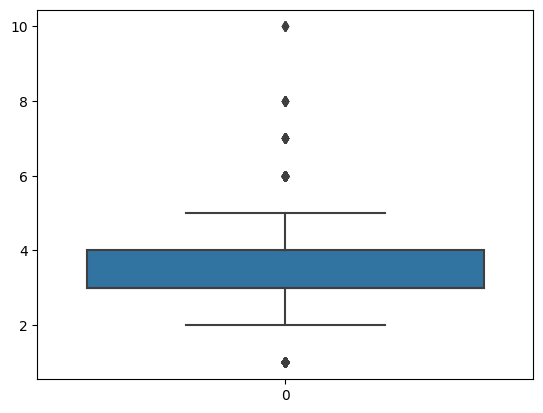

In [31]:
#Bedrooms
sns.boxplot(data['Bedrooms'])

In [32]:
Q1 = np.percentile(data['Bedrooms'], 25, method='midpoint')
Q3 = np.percentile(data['Bedrooms'], 75, method='midpoint')

IQR = Q3 -  Q1
print(Q1, Q3)

3.0 4.0


In [33]:
upper =  Q3 + 1.5 * IQR
lower =   Q1 - 1.5 * IQR
upper_array = np.array(data['Bedrooms'] >= upper)
lower_array = np.array(data['Bedrooms'] <= lower)

print(lower, upper)
print(f'Lower bond values {lower_array.sum()}, Upper bond values {upper_array.sum()}')

1.5 5.5
Lower bond values 325, Upper bond values 150


In [34]:
data = data[(data['Bedrooms'] >= lower) & (data['Bedrooms'] <= upper)]

In [35]:
data.head()

,Bedrooms,Bathrooms,Price,Location,Backup Generator,Balcony,CCTV,En Suite,Furnished,Gym,...,Service Charge Included,Swimming Pool,,Serviced,Bus Stop,Hospital,School,Shopping Centre,Scenic View,Golf Course
1,5.0,5.0,460000.0,Westlands,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,4.0,260000.0,Kilimani,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,4.0,NaN,Westlands area,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.0,4.0,NaN,Westlands area,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,3.0,3.0,200000.0,Westlands,1,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [36]:
data.reset_index(drop=True, inplace=True)

<Axes: >

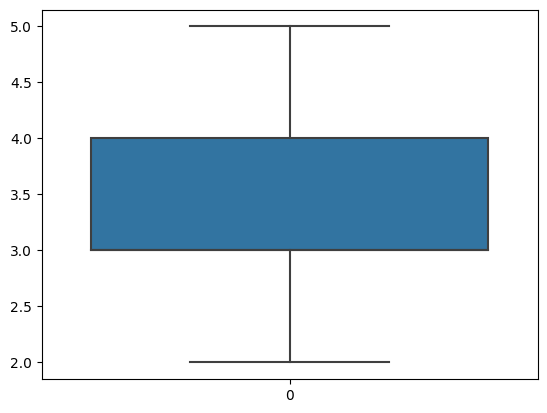

In [37]:
sns.boxplot(data['Bedrooms'])

<Axes: >

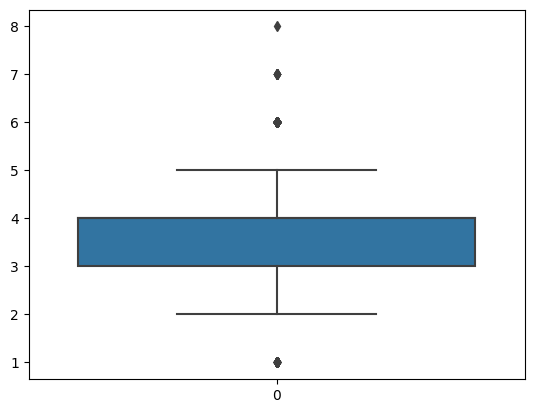

In [38]:
#Bathrooms
sns.boxplot(data['Bathrooms'])

In [39]:
Q1 = np.percentile(data['Bathrooms'], 25, method='midpoint')
Q3 = np.percentile(data['Bathrooms'], 75, method='midpoint')

IQR = Q3 - Q1

In [40]:
upper =  Q3 + 1.5 * IQR
lower =   Q1 - 1.5 * IQR
upper_array = np.where(data['Bathrooms'] >= upper)[0]
lower_array = np.where(data['Bathrooms'] <= lower)[0]

print(lower, upper)
print(f'Lower bond values {lower_array.sum()}, Upper bond values {upper_array.sum()}')

1.5 5.5
Lower bond values 258481, Upper bond values 504376


In [41]:
data = data[(data['Bathrooms'] >= lower) & (data['Bathrooms'] <= upper)]

<Axes: >

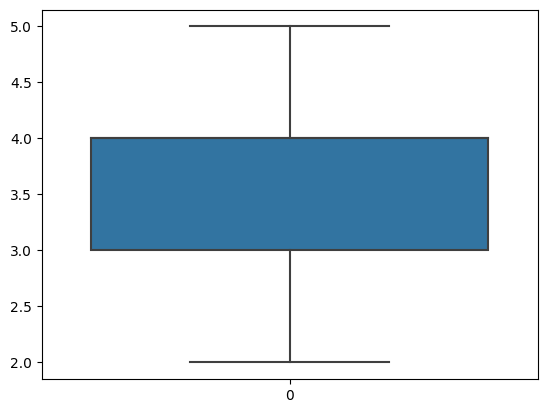

In [42]:
sns.boxplot(data['Bathrooms'])

In [43]:
data['Price'].fillna(data['Price'].mean(), inplace=True)
print(data['Price'].info())

<class 'pandas.core.series.Series'>
Index: 5460 entries, 0 to 5727
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
5460 non-null   float64
dtypes: float64(1)
memory usage: 214.4 KB
None


<ipython-input-43-46858987aed3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(data['Price'].mean(), inplace=True)


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5460 entries, 0 to 5727
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bedrooms                 5460 non-null   float64
 1   Bathrooms                5460 non-null   float64
 2   Price                    5460 non-null   float64
 3   Location                 5452 non-null   object 
 4   Backup Generator         5460 non-null   int64  
 5   Balcony                  5460 non-null   int64  
 6   CCTV                     5460 non-null   int64  
 7   En Suite                 5460 non-null   int64  
 8   Furnished                5460 non-null   int64  
 9   Gym                      5460 non-null   int64  
 10  Lift/Elevator            5460 non-null   int64  
 11  Parking                  5460 non-null   int64  
 12  Alarm                    5460 non-null   int64  
 13  BBQ                      5460 non-null   int64  
 14  Borehole                 5460

In [45]:
data.head()

,Bedrooms,Bathrooms,Price,Location,Backup Generator,Balcony,CCTV,En Suite,Furnished,Gym,...,Service Charge Included,Swimming Pool,,Serviced,Bus Stop,Hospital,School,Shopping Centre,Scenic View,Golf Course
0,5.0,5.0,460000.000000,Westlands,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,4.0,260000.000000,Kilimani,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,4.0,262574.912721,Westlands area,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3.0,4.0,262574.912721,Westlands area,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,3.0,3.0,200000.000000,Westlands,1,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0


<Axes: >

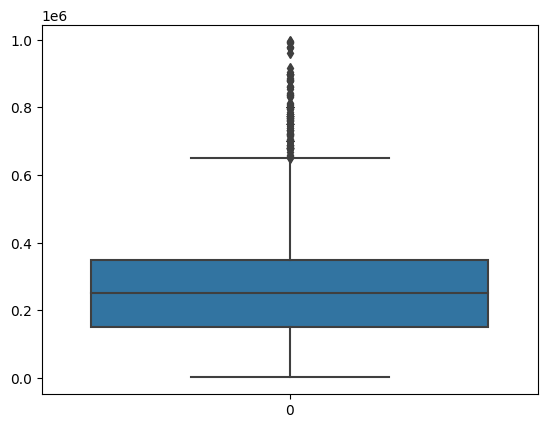

In [46]:
#PRICE
sns.boxplot(data['Price'])

In [47]:
Q1 = np.percentile(data['Price'], 25, method='midpoint')
Q3 = np.percentile(data['Price'], 75, method='midpoint')

IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 150000.0, Q3: 350000.0, IQR: 200000.0


In [48]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(lower, upper)

-150000.0 650000.0


In [49]:
data = data[(data['Price'] >= lower) & (data['Price'] <= upper)]

<Axes: >

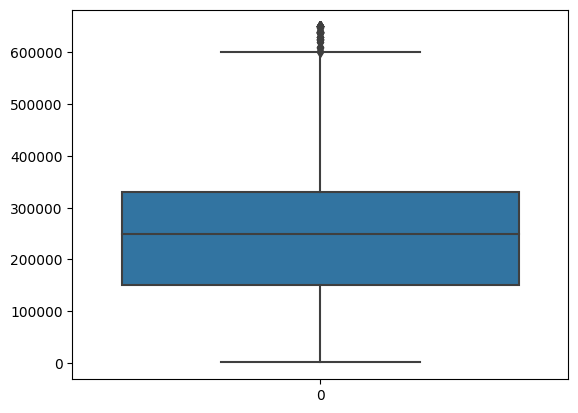

In [50]:
sns.boxplot(data['Price'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


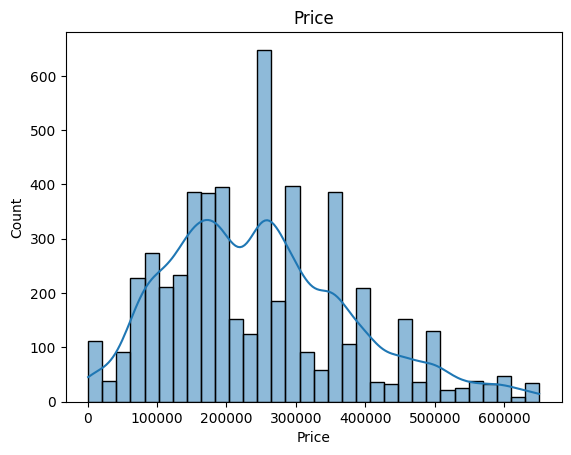

In [51]:
#Price analysis
sns.histplot(data=data['Price'], kde=True)
plt.title("Price")
plt.show()

**Preprocessing Data**

In [52]:
data.head()

,Bedrooms,Bathrooms,Price,Location,Backup Generator,Balcony,CCTV,En Suite,Furnished,Gym,...,Service Charge Included,Swimming Pool,,Serviced,Bus Stop,Hospital,School,Shopping Centre,Scenic View,Golf Course
0,5.0,5.0,460000.000000,Westlands,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,4.0,260000.000000,Kilimani,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,4.0,262574.912721,Westlands area,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3.0,4.0,262574.912721,Westlands area,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,3.0,3.0,200000.000000,Westlands,1,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0


**Feature Engineering**

In [53]:
# Select only the numerical columns
numerical_data = data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Print or display the correlation matrix
print(correlation_matrix)

                         Bedrooms  Bathrooms     Price  Backup Generator  \
Bedrooms                 1.000000   0.752971  0.469603         -0.136464   
Bathrooms                0.752971   1.000000  0.445072         -0.095732   
Price                    0.469603   0.445072  1.000000         -0.011409   
Backup Generator        -0.136464  -0.095732 -0.011409          1.000000   
Balcony                  0.097311  -0.061781  0.028722          0.346967   
CCTV                    -0.159702  -0.189620 -0.145173          0.616994   
En Suite                 0.119068  -0.161145  0.015365          0.333105   
Furnished               -0.390332  -0.349050 -0.035623          0.258566   
Gym                     -0.339048  -0.312865 -0.123075          0.454563   
Lift/Elevator           -0.470215  -0.376087 -0.270502          0.485285   
Parking                  0.010739  -0.121640 -0.033242          0.406301   
Alarm                   -0.025187  -0.055511  0.053323          0.488907   
BBQ         

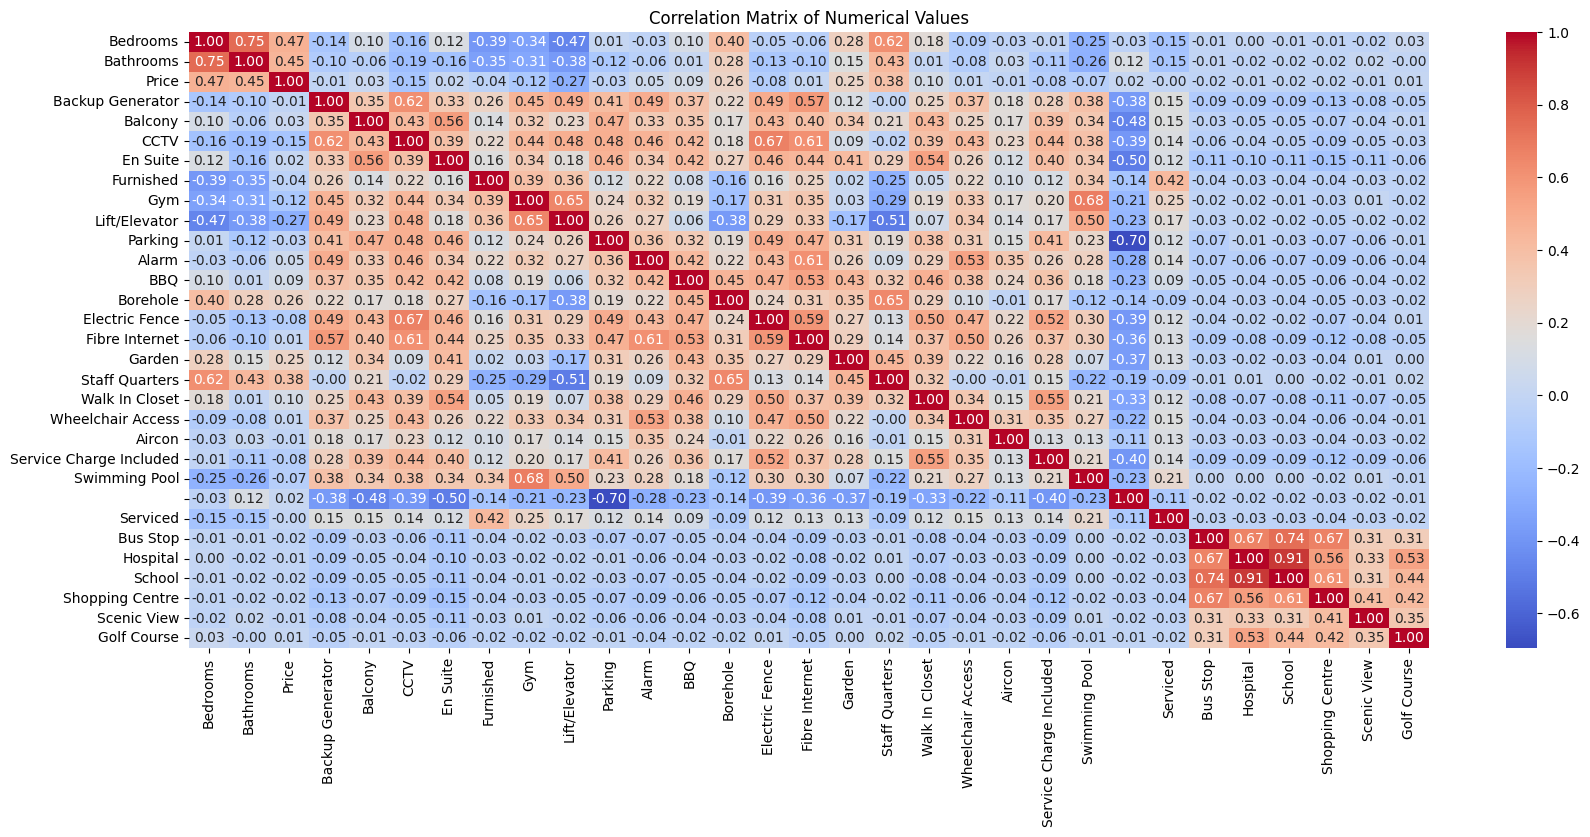

In [54]:
%matplotlib inline
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Values')
plt.show()

In [55]:
data.dropna(subset=['Location'],inplace=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5303 entries, 0 to 5727
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bedrooms                 5303 non-null   float64
 1   Bathrooms                5303 non-null   float64
 2   Price                    5303 non-null   float64
 3   Location                 5303 non-null   object 
 4   Backup Generator         5303 non-null   int64  
 5   Balcony                  5303 non-null   int64  
 6   CCTV                     5303 non-null   int64  
 7   En Suite                 5303 non-null   int64  
 8   Furnished                5303 non-null   int64  
 9   Gym                      5303 non-null   int64  
 10  Lift/Elevator            5303 non-null   int64  
 11  Parking                  5303 non-null   int64  
 12  Alarm                    5303 non-null   int64  
 13  BBQ                      5303 non-null   int64  
 14  Borehole                 5303

In [57]:
data = data.dropna(axis=0)

In [58]:
data.isna().sum()

Bedrooms                   0
Bathrooms                  0
Price                      0
Location                   0
Backup Generator           0
Balcony                    0
CCTV                       0
En Suite                   0
Furnished                  0
Gym                        0
Lift/Elevator              0
Parking                    0
Alarm                      0
BBQ                        0
Borehole                   0
Electric Fence             0
Fibre Internet             0
Garden                     0
Staff Quarters             0
Walk In Closet             0
Wheelchair Access          0
Aircon                     0
Service Charge Included    0
Swimming Pool              0
                           0
Serviced                   0
Bus Stop                   0
Hospital                   0
School                     0
Shopping Centre            0
Scenic View                0
Golf Course                0
dtype: int64

In [59]:
Y=data['Price']

In [60]:
Y.isna().sum()

0

In [61]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 5303 entries, 0 to 5727
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
5303 non-null   float64
dtypes: float64(1)
memory usage: 82.9 KB


In [62]:
X=data

In [63]:
X.isna().sum()

Bedrooms                   0
Bathrooms                  0
Price                      0
Location                   0
Backup Generator           0
Balcony                    0
CCTV                       0
En Suite                   0
Furnished                  0
Gym                        0
Lift/Elevator              0
Parking                    0
Alarm                      0
BBQ                        0
Borehole                   0
Electric Fence             0
Fibre Internet             0
Garden                     0
Staff Quarters             0
Walk In Closet             0
Wheelchair Access          0
Aircon                     0
Service Charge Included    0
Swimming Pool              0
                           0
Serviced                   0
Bus Stop                   0
Hospital                   0
School                     0
Shopping Centre            0
Scenic View                0
Golf Course                0
dtype: int64

In [64]:
print(X.shape, Y.shape)

(5303, 32) (5303,)


In [65]:
columns_to_drop = [
    'Price','Serviced', 'Scenic View', 'Aircon', 'Hospital', 'Backup Generator',
    'School', 'Shopping Centre', 'Bus Stop', 'Parking', 'Furnished',
    'Swimming Pool', 'Service Charge Included', 'Electric Fence',
    'Gym', 'CCTV', 'Lift/Elevator'
]

# Drop the specified columns
X.drop(columns=columns_to_drop, axis=1, inplace=True)

In [66]:
X.head()

,Bedrooms,Bathrooms,Location,Balcony,En Suite,Alarm,BBQ,Borehole,Fibre Internet,Garden,Staff Quarters,Walk In Closet,Wheelchair Access,,Golf Course
0,5.0,5.0,Westlands,1,1,1,1,1,1,1,1,1,1,0,0
1,4.0,4.0,Kilimani,0,1,0,0,0,1,0,0,1,0,0,0
2,3.0,4.0,Westlands area,1,0,1,0,0,1,1,0,0,1,0,0
3,3.0,4.0,Westlands area,1,0,1,0,0,1,1,0,0,0,0,0
4,3.0,3.0,Westlands,1,1,1,1,0,1,0,0,1,1,0,0


In [67]:
X.drop(data.columns[13],axis=1,inplace=True)
X.head()

,Bedrooms,Bathrooms,Location,Balcony,En Suite,Alarm,BBQ,Borehole,Fibre Internet,Garden,Staff Quarters,Walk In Closet,Wheelchair Access,Golf Course
0,5.0,5.0,Westlands,1,1,1,1,1,1,1,1,1,1,0
1,4.0,4.0,Kilimani,0,1,0,0,0,1,0,0,1,0,0
2,3.0,4.0,Westlands area,1,0,1,0,0,1,1,0,0,1,0
3,3.0,4.0,Westlands area,1,0,1,0,0,1,1,0,0,0,0
4,3.0,3.0,Westlands,1,1,1,1,0,1,0,0,1,1,0


In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5303 entries, 0 to 5727
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bedrooms           5303 non-null   float64
 1   Bathrooms          5303 non-null   float64
 2   Location           5303 non-null   object 
 3   Balcony            5303 non-null   int64  
 4   En Suite           5303 non-null   int64  
 5   Alarm              5303 non-null   int64  
 6   BBQ                5303 non-null   int64  
 7   Borehole           5303 non-null   int64  
 8   Fibre Internet     5303 non-null   int64  
 9   Garden             5303 non-null   int64  
 10  Staff Quarters     5303 non-null   int64  
 11  Walk In Closet     5303 non-null   int64  
 12  Wheelchair Access  5303 non-null   int64  
 13  Golf Course        5303 non-null   int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 621.4+ KB


In [69]:
columns_to_drop = ['Borehole']

# Drop the specified columns
X.drop(columns=columns_to_drop, axis=1, inplace=True)
X.head()

,Bedrooms,Bathrooms,Location,Balcony,En Suite,Alarm,BBQ,Fibre Internet,Garden,Staff Quarters,Walk In Closet,Wheelchair Access,Golf Course
0,5.0,5.0,Westlands,1,1,1,1,1,1,1,1,1,0
1,4.0,4.0,Kilimani,0,1,0,0,1,0,0,1,0,0
2,3.0,4.0,Westlands area,1,0,1,0,1,1,0,0,1,0
3,3.0,4.0,Westlands area,1,0,1,0,1,1,0,0,0,0
4,3.0,3.0,Westlands,1,1,1,1,1,0,0,1,1,0


In [70]:
# X.dropna(subset=['Location'],inplace=True)

In [71]:
locations = {'Location': X['Location']}

In [72]:
df = pd.DataFrame(locations)

In [73]:
df.head()

,Location
0,Westlands
1,Kilimani
2,Westlands area
3,Westlands area
4,Westlands


In [74]:
df.to_csv('locations.csv',index=False)

In [75]:
categories=X['Location'].values.reshape(-1,1)

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
encoder=OneHotEncoder(sparse=False)
dummies=encoder.fit_transform(categories)
# dummies=np.array()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
# dummies=pd.get_dummies(X['Location'])

In [79]:
# dummies=dummies.astype('int64')

In [80]:
encoded_df=pd.DataFrame(dummies,columns=encoder.get_feature_names_out(['Location']))

In [81]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location_Buruburu         5303 non-null   float64
 1   Location_Dennis pritt     5303 non-null   float64
 2   Location_Embakasi         5303 non-null   float64
 3   Location_Hurlingham       5303 non-null   float64
 4   Location_Industrial area  5303 non-null   float64
 5   Location_Karen            5303 non-null   float64
 6   Location_Karen hardy      5303 non-null   float64
 7   Location_Kiambu road      5303 non-null   float64
 8   Location_Kileleshwa       5303 non-null   float64
 9   Location_Kilimani         5303 non-null   float64
 10  Location_Langata          5303 non-null   float64
 11  Location_Lavington        5303 non-null   float64
 12  Location_Mombasa road     5303 non-null   float64
 13  Location_Muthaiga         5303 non-null   float64
 14  Location

In [82]:
encoded_df.columns = encoded_df.columns.str.replace('Location_', '')

In [83]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Buruburu         5303 non-null   float64
 1   Dennis pritt     5303 non-null   float64
 2   Embakasi         5303 non-null   float64
 3   Hurlingham       5303 non-null   float64
 4   Industrial area  5303 non-null   float64
 5   Karen            5303 non-null   float64
 6   Karen hardy      5303 non-null   float64
 7   Kiambu road      5303 non-null   float64
 8   Kileleshwa       5303 non-null   float64
 9   Kilimani         5303 non-null   float64
 10  Langata          5303 non-null   float64
 11  Lavington        5303 non-null   float64
 12  Mombasa road     5303 non-null   float64
 13  Muthaiga         5303 non-null   float64
 14  Nairobi cbd      5303 non-null   float64
 15  Naivasha road    5303 non-null   float64
 16  Ngara            5303 non-null   float64
 17  Ngong road    

In [84]:
encoded_df.isna().sum()

Buruburu           0
Dennis pritt       0
Embakasi           0
Hurlingham         0
Industrial area    0
Karen              0
Karen hardy        0
Kiambu road        0
Kileleshwa         0
Kilimani           0
Langata            0
Lavington          0
Mombasa road       0
Muthaiga           0
Nairobi cbd        0
Naivasha road      0
Ngara              0
Ngong road         0
Riara road         0
Ridgeways          0
Roysambu           0
Ruaraka            0
State house        0
Thika road         0
Upper hill         0
Valley arcade      0
Westlands          0
Westlands area     0
dtype: int64

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5303 entries, 0 to 5727
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bedrooms           5303 non-null   float64
 1   Bathrooms          5303 non-null   float64
 2   Location           5303 non-null   object 
 3   Balcony            5303 non-null   int64  
 4   En Suite           5303 non-null   int64  
 5   Alarm              5303 non-null   int64  
 6   BBQ                5303 non-null   int64  
 7   Fibre Internet     5303 non-null   int64  
 8   Garden             5303 non-null   int64  
 9   Staff Quarters     5303 non-null   int64  
 10  Walk In Closet     5303 non-null   int64  
 11  Wheelchair Access  5303 non-null   int64  
 12  Golf Course        5303 non-null   int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 580.0+ KB


In [86]:
X.reset_index(drop=True, inplace=True)

In [87]:
encoded_df.reset_index(drop=True, inplace=True)

In [88]:
X = pd.concat([X, encoded_df], axis=1)

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bedrooms           5303 non-null   float64
 1   Bathrooms          5303 non-null   float64
 2   Location           5303 non-null   object 
 3   Balcony            5303 non-null   int64  
 4   En Suite           5303 non-null   int64  
 5   Alarm              5303 non-null   int64  
 6   BBQ                5303 non-null   int64  
 7   Fibre Internet     5303 non-null   int64  
 8   Garden             5303 non-null   int64  
 9   Staff Quarters     5303 non-null   int64  
 10  Walk In Closet     5303 non-null   int64  
 11  Wheelchair Access  5303 non-null   int64  
 12  Golf Course        5303 non-null   int64  
 13  Buruburu           5303 non-null   float64
 14  Dennis pritt       5303 non-null   float64
 15  Embakasi           5303 non-null   float64
 16  Hurlingham         5303 

In [90]:
X.drop('Location', axis=1, inplace=True)

In [91]:
X.head()

,Bedrooms,Bathrooms,Balcony,En Suite,Alarm,BBQ,Fibre Internet,Garden,Staff Quarters,Walk In Closet,...,Riara road,Ridgeways,Roysambu,Ruaraka,State house,Thika road,Upper hill,Valley arcade,Westlands,Westlands area
0,5.0,5.0,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.0,4.0,0,1,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,4.0,1,0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,4.0,1,0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,3.0,1,1,1,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bedrooms           5303 non-null   float64
 1   Bathrooms          5303 non-null   float64
 2   Balcony            5303 non-null   int64  
 3   En Suite           5303 non-null   int64  
 4   Alarm              5303 non-null   int64  
 5   BBQ                5303 non-null   int64  
 6   Fibre Internet     5303 non-null   int64  
 7   Garden             5303 non-null   int64  
 8   Staff Quarters     5303 non-null   int64  
 9   Walk In Closet     5303 non-null   int64  
 10  Wheelchair Access  5303 non-null   int64  
 11  Golf Course        5303 non-null   int64  
 12  Buruburu           5303 non-null   float64
 13  Dennis pritt       5303 non-null   float64
 14  Embakasi           5303 non-null   float64
 15  Hurlingham         5303 non-null   float64
 16  Industrial area    5303 

In [93]:
X.isnull().sum()

Bedrooms             0
Bathrooms            0
Balcony              0
En Suite             0
Alarm                0
BBQ                  0
Fibre Internet       0
Garden               0
Staff Quarters       0
Walk In Closet       0
Wheelchair Access    0
Golf Course          0
Buruburu             0
Dennis pritt         0
Embakasi             0
Hurlingham           0
Industrial area      0
Karen                0
Karen hardy          0
Kiambu road          0
Kileleshwa           0
Kilimani             0
Langata              0
Lavington            0
Mombasa road         0
Muthaiga             0
Nairobi cbd          0
Naivasha road        0
Ngara                0
Ngong road           0
Riara road           0
Ridgeways            0
Roysambu             0
Ruaraka              0
State house          0
Thika road           0
Upper hill           0
Valley arcade        0
Westlands            0
Westlands area       0
dtype: int64

In [94]:
X.head()

,Bedrooms,Bathrooms,Balcony,En Suite,Alarm,BBQ,Fibre Internet,Garden,Staff Quarters,Walk In Closet,...,Riara road,Ridgeways,Roysambu,Ruaraka,State house,Thika road,Upper hill,Valley arcade,Westlands,Westlands area
0,5.0,5.0,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.0,4.0,0,1,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,4.0,1,0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,4.0,1,0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,3.0,1,1,1,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
print(X.shape, Y.shape)

(5303, 40) (5303,)


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [97]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(X_train,Y_train)
lg.score(X_test,Y_test)

0.3568646334794191

In [98]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,Y, cv=cv)

array([0.28842595, 0.33583649, 0.32644639, 0.33385042, 0.31996057])

In [99]:
#!pip uninstall scikit-learn

In [100]:
#!pip install sklearn

In [101]:
# pip install --upgrade --force-reinstall scikit-learn

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridserach(X,Y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'copy_X':[True], # Make a copy of input features
                'fit_intercept' :[True],  # Calculate intercept
                'n_jobs' :[None], # Use default number of CPU cores
                'positive' :[False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridserach(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.937e+12, tolerance: 7.527e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.177e+13, tolerance: 7.473e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e+13, tolerance: 7.725e

,model,best_score,best_params
0,linear_regression,0.320904,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.321252,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.173501,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [104]:
X.columns

Index(['Bedrooms', 'Bathrooms', 'Balcony', 'En Suite', 'Alarm', 'BBQ',
       'Fibre Internet', 'Garden', 'Staff Quarters', 'Walk In Closet',
       'Wheelchair Access', 'Golf Course', 'Buruburu', 'Dennis pritt',
       'Embakasi', 'Hurlingham', 'Industrial area', 'Karen', 'Karen hardy',
       'Kiambu road', 'Kileleshwa', 'Kilimani', 'Langata', 'Lavington',
       'Mombasa road', 'Muthaiga', 'Nairobi cbd', 'Naivasha road', 'Ngara',
       'Ngong road', 'Riara road', 'Ridgeways', 'Roysambu', 'Ruaraka',
       'State house', 'Thika road', 'Upper hill', 'Valley arcade', 'Westlands',
       'Westlands area'],
      dtype='object')

In [105]:
X.columns

Index(['Bedrooms', 'Bathrooms', 'Balcony', 'En Suite', 'Alarm', 'BBQ',
       'Fibre Internet', 'Garden', 'Staff Quarters', 'Walk In Closet',
       'Wheelchair Access', 'Golf Course', 'Buruburu', 'Dennis pritt',
       'Embakasi', 'Hurlingham', 'Industrial area', 'Karen', 'Karen hardy',
       'Kiambu road', 'Kileleshwa', 'Kilimani', 'Langata', 'Lavington',
       'Mombasa road', 'Muthaiga', 'Nairobi cbd', 'Naivasha road', 'Ngara',
       'Ngong road', 'Riara road', 'Ridgeways', 'Roysambu', 'Ruaraka',
       'State house', 'Thika road', 'Upper hill', 'Valley arcade', 'Westlands',
       'Westlands area'],
      dtype='object')

In [106]:
def predict_price(data, location,bed,bath,balcony,ensiut,alarm,bbq,fibreinternet,garden,StaffQuarters,Closet,
       WheelchairAccess,GolfCourse):
    loc_index=np.where(data.columns==location)[0][0]
    x=np.zeros(len(data.columns))
    x[0] = bed
    x[1] = bath
    x[2] = balcony
    x[3] = ensiut
    x[4] = alarm
    x[5] = bbq
    x[6] = fibreinternet
    x[7] = garden
    x[8] = StaffQuarters
    x[9] = Closet
    x[10]= WheelchairAccess
    x[11]= GolfCourse


    if loc_index >=0:
        x[loc_index]=1
    return lg.predict([x])[0]


In [107]:
predict_price(X,'Karen',4,4,1,0,0,1,1,0,0,0,0,0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


248013.83231172131

In [108]:
predict_price(X,'Lavington',4,4,1,0,0,1,1,0,0,0,0,0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


229596.3193726785

In [109]:
X.columns


Index(['Bedrooms', 'Bathrooms', 'Balcony', 'En Suite', 'Alarm', 'BBQ',
       'Fibre Internet', 'Garden', 'Staff Quarters', 'Walk In Closet',
       'Wheelchair Access', 'Golf Course', 'Buruburu', 'Dennis pritt',
       'Embakasi', 'Hurlingham', 'Industrial area', 'Karen', 'Karen hardy',
       'Kiambu road', 'Kileleshwa', 'Kilimani', 'Langata', 'Lavington',
       'Mombasa road', 'Muthaiga', 'Nairobi cbd', 'Naivasha road', 'Ngara',
       'Ngong road', 'Riara road', 'Ridgeways', 'Roysambu', 'Ruaraka',
       'State house', 'Thika road', 'Upper hill', 'Valley arcade', 'Westlands',
       'Westlands area'],
      dtype='object')

In [115]:
my_dataset=X.head()
my_dataset.to_csv("/content/drive/MyDrive/dataset_columns.csv",index=False)

In [111]:
import pickle
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(lg, file)

In [112]:
# import json
# columns={
#     'data_columns': [col.lower() for col in X.columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))